In [544]:
import numpy as py
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
sb.set()

In [545]:
cvd_data = pd.read_csv("cardio_train.csv", sep = ';')
cvd_data = cvd_data.drop(["id"], axis=1)
cvd_data.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,20540,1,170,72.0,120,80,2,1,0,0,1,0


### Discard N/A and Null Values

In [546]:
cvd_data = cvd_data.dropna()

In [547]:
numerics = ['ap_hi', 'ap_lo', 'height', 'weight', 'age']
cvd_data[numerics].describe()

,ap_hi,ap_lo,height,weight,age
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,128.817286,96.630414,164.359229,74.205690,19468.865814
std,154.011419,188.472530,8.210126,14.395757,2467.251667
min,-150.000000,-70.000000,55.000000,10.000000,10798.000000
25%,120.000000,80.000000,159.000000,65.000000,17664.000000
50%,120.000000,80.000000,165.000000,72.000000,19703.000000
75%,140.000000,90.000000,170.000000,82.000000,21327.000000
max,16020.000000,11000.000000,250.000000,200.000000,23713.000000


In [548]:
cvd_data[numerics].std()

ap_hi      154.011419
ap_lo      188.472530
height       8.210126
weight      14.395757
age       2467.251667
dtype: float64

### Calculate BMI and remove outliers

In [549]:
def calc_bmi(param):
    # BMI = [weight] kg / [height ^ 2] m^2
    weight = param[0] 
    height = param[1] / 100 # convert cm to m 
    return weight / math.pow(height, 2)

cvd_data["bmi"] = cvd_data[["weight", "height"]].apply(calc_bmi, axis=1) # creating the bmi column

cvd_data = cvd_data.drop(cvd_data[(cvd_data.bmi > 360) | (cvd_data.bmi < 0)].index) 

### Convert the unit of age from days to years

In [550]:
cvd_data["age"] = cvd_data["age"] / 365.25

### Remove outliers for systolic and diastolic blood pressure

In [551]:
numerics = ['ap_hi', 'ap_lo', 'bmi', 'age']

cvd_data = cvd_data.drop(cvd_data[(cvd_data.ap_hi > 370) | (cvd_data.ap_hi < 0)].index) 
cvd_data = cvd_data.drop(cvd_data[(cvd_data.ap_lo > 360) | (cvd_data.ap_lo < 0)].index)
cvd_data = cvd_data.drop(labels=["weight", "height"], axis=1)


cvd_data[numerics].describe()

,ap_hi,ap_lo,bmi,age
count,69000.000000,69000.000000,69000.000000,69000.000000
mean,126.325145,81.332797,27.524438,53.288989
std,17.721845,9.877680,6.080759,6.757696
min,7.000000,0.000000,3.471784,29.563313
25%,120.000000,80.000000,23.875115,48.341547
50%,120.000000,80.000000,26.346494,53.937029
75%,140.000000,90.000000,30.119376,58.379192
max,309.000000,190.000000,298.666667,64.922656


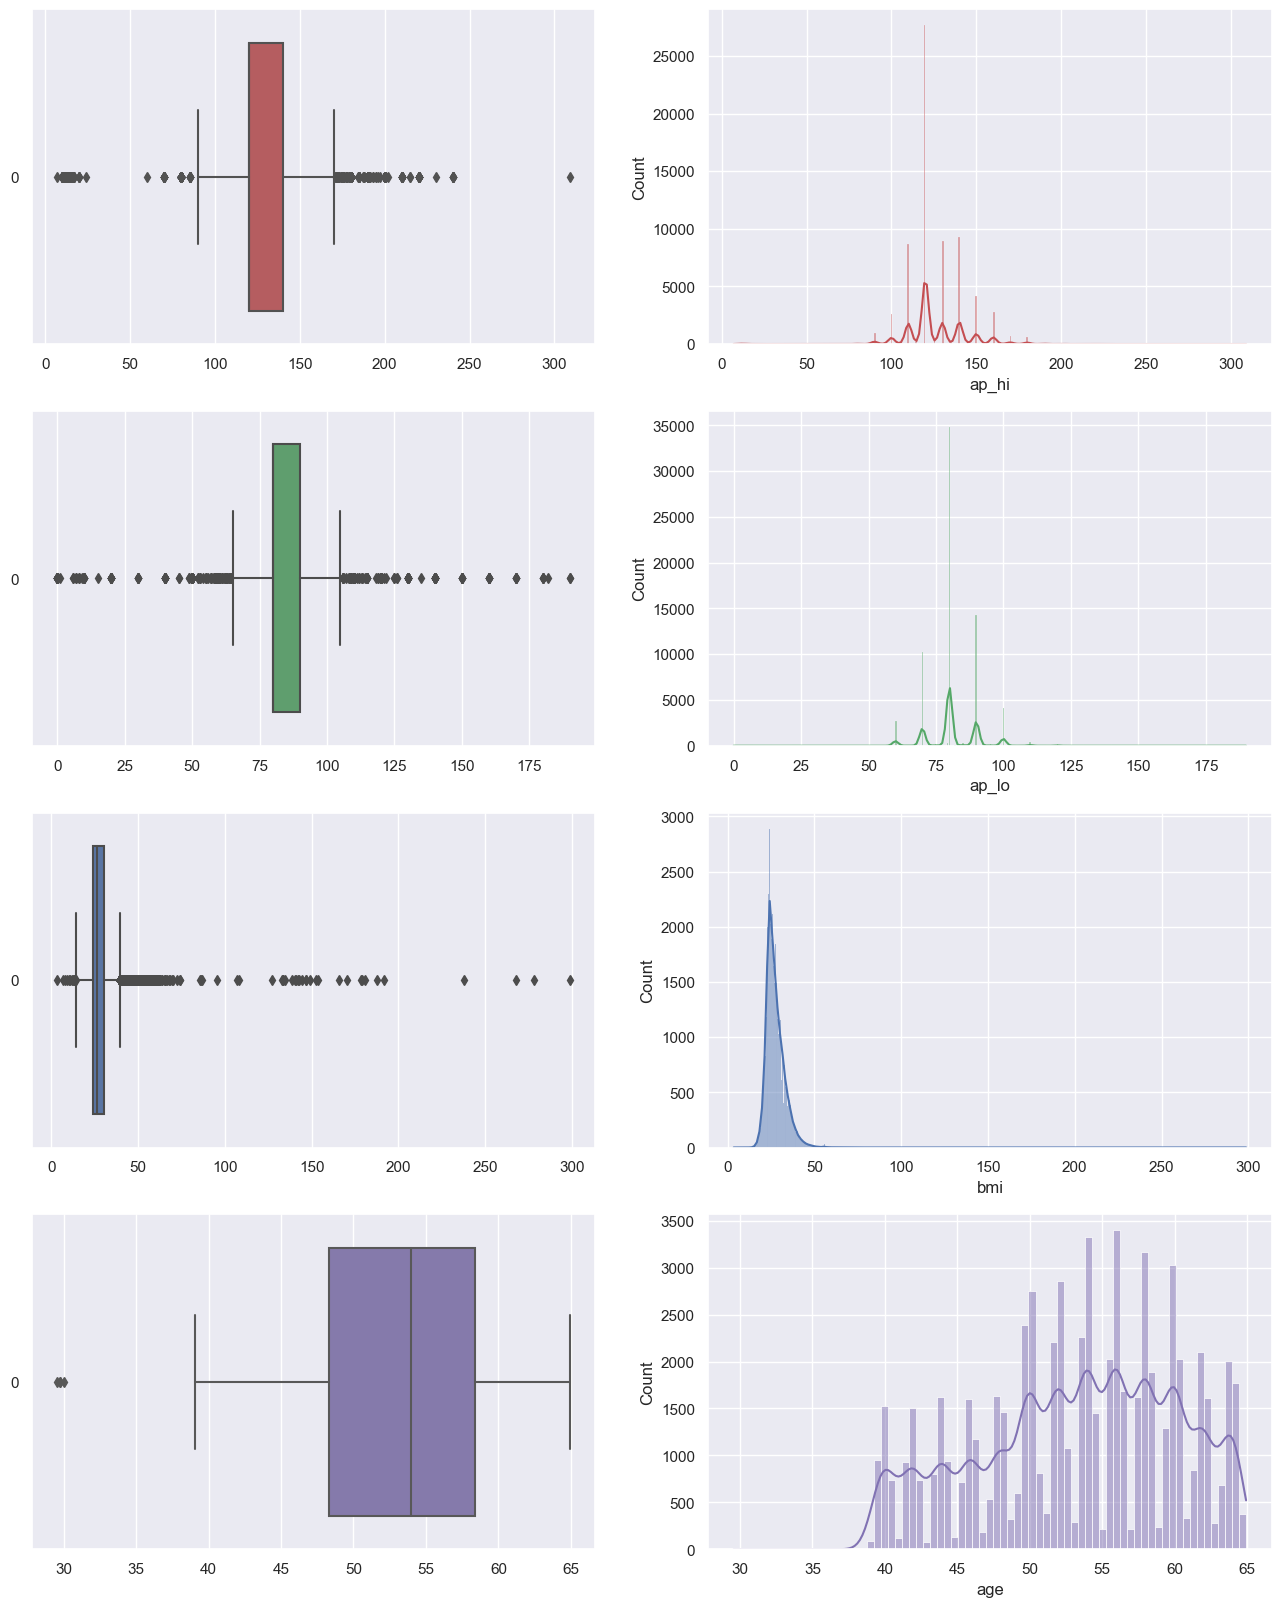

In [552]:
f, axes = plt.subplots(4, 2, figsize = (16, 20))
colors = ["r","g", "b", "m", "c"]
count = 0
for var in cvd_data[numerics]:
    axes[count, 0].set(ylabel=None)
    sb.boxplot(data = cvd_data[var], y=None ,orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data = cvd_data[var], color = colors[count], ax = axes[count,1], kde = True)
    count += 1

#bitch wtf

In [553]:
cvd_data[numerics].corr()

,ap_hi,ap_lo,bmi,age
ap_hi,1.000000,0.644223,0.216541,0.197734
ap_lo,0.644223,1.000000,0.200152,0.150938
bmi,0.216541,0.200152,1.000000,0.086287
age,0.197734,0.150938,0.086287,1.000000


<AxesSubplot:>

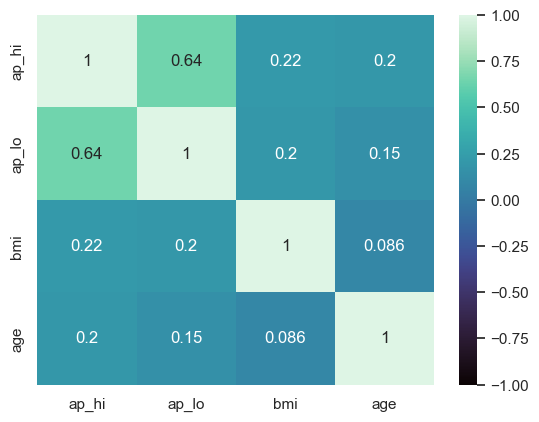

In [554]:
sb.heatmap(data = cvd_data[numerics].corr(), vmax = 1, vmin = -1, annot = True, cmap = 'mako')

In [555]:
categorical = ["gender","cholesterol","gluc","smoke","alco","active"]


In [556]:
for var in cvd_data[categorical]:
    cvd_data[var] = cvd_data[var].astype('category')
    
cvd_data[categorical].dtypes

gender         category
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
dtype: object

In [557]:
cvd_data[categorical].describe()

,gender,cholesterol,gluc,smoke,alco,active
count,69000,69000,69000,69000,69000,69000
unique,2,3,3,2,2,2
top,1,1,1,0,0,1
freq,44939,51759,58664,62937,65302,55427


In [558]:
# cvd_data['gender'] = cvd_data['gender'].map({
#     1 : 'Female',
#     2 : 'Male'
# })

# cvd_data['cholesterol'] = cvd_data['cholesterol'].map({
#     1 : 'Normal',
#     2 : 'Above Normal',
#     3 : 'Well Above Normal'
# })

# cvd_data['gluc'] = cvd_data['gluc'].map({
#     1 : 'Normal',
#     2 : 'Above Normal',
#     3 : 'Well Above Normal'
# })

# cvd_data['smoke'] = cvd_data['smoke'].map({
#     0 : 'Non-smoker',
#     1 : 'Smoker'
# })

# cvd_data['alco'] = cvd_data['alco'].map({
#     0 : 'No alcohol',
#     1 : 'Alcohol'
# })

# cvd_data['active'] = cvd_data['active'].map({
#     0 : 'Not active',
#     1 : 'Active'
# })

# cvd_data['cardio'] = cvd_data['cardio'].map({
#     0 : 'No Cvd',
#     1 : 'Cvd'
# })

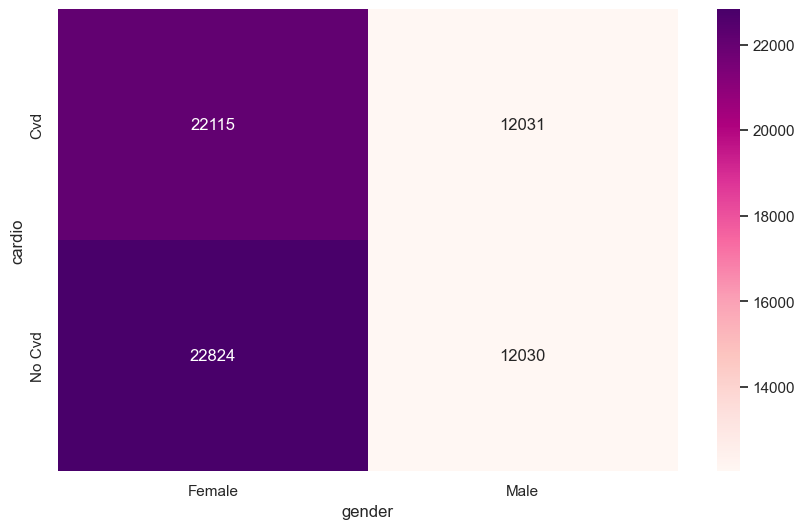

In [559]:
plt.figure(figsize = (10, 6))
sb.heatmap(data = cvd_data.groupby(['cardio', 'gender']).size().unstack(), annot = True, cmap = 'RdPu', fmt = 'g')
plt.show()

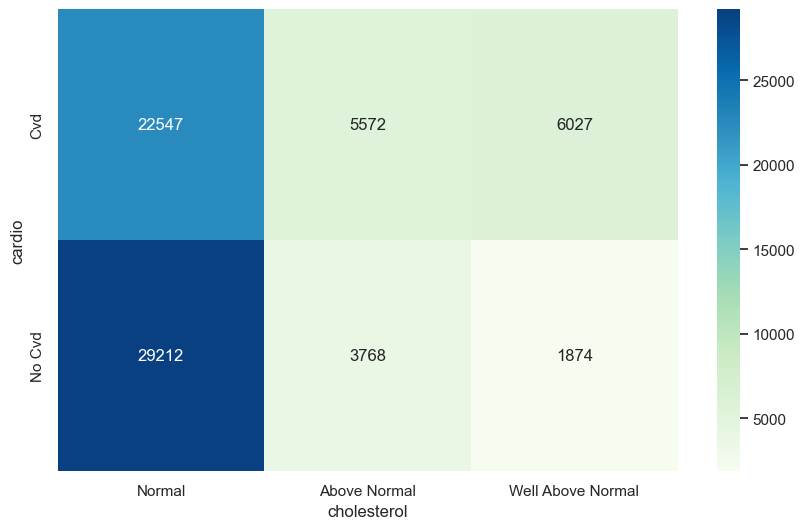

In [560]:
plt.figure(figsize = (10, 6))
sb.heatmap(data = cvd_data.groupby(['cardio', 'cholesterol']).size().unstack(), annot = True, cmap = 'GnBu', fmt = 'g')
plt.show()

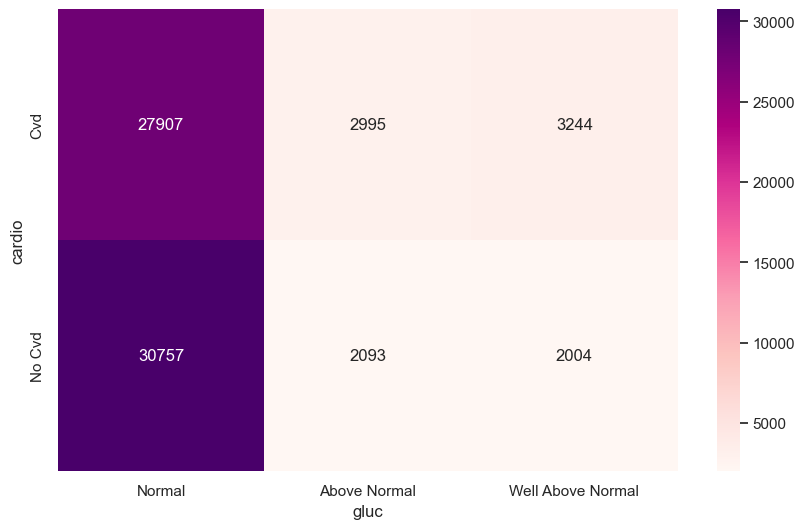

In [561]:
plt.figure(figsize = (10, 6))
sb.heatmap(data = cvd_data.groupby(['cardio', 'gluc']).size().unstack(), annot = True, cmap = 'RdPu', fmt = 'g')
plt.show()

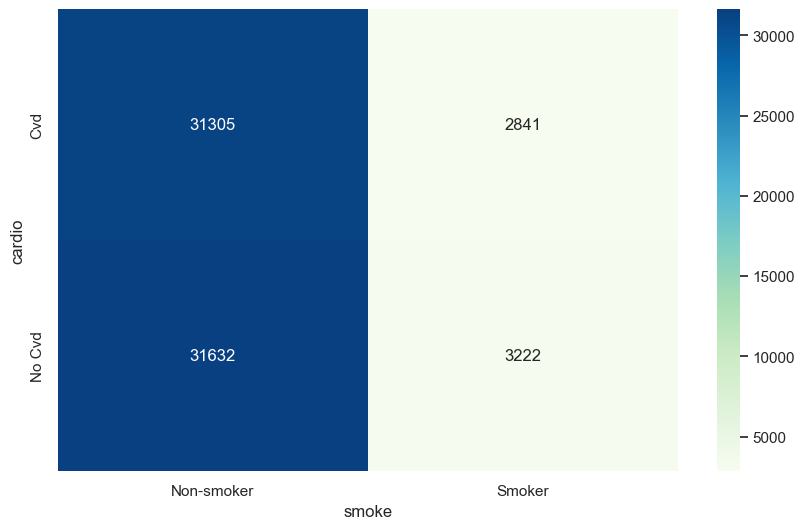

In [562]:
plt.figure(figsize = (10, 6))
sb.heatmap(data = cvd_data.groupby(['cardio', 'smoke']).size().unstack(), annot = True, cmap = 'GnBu', fmt = 'g')
plt.show()

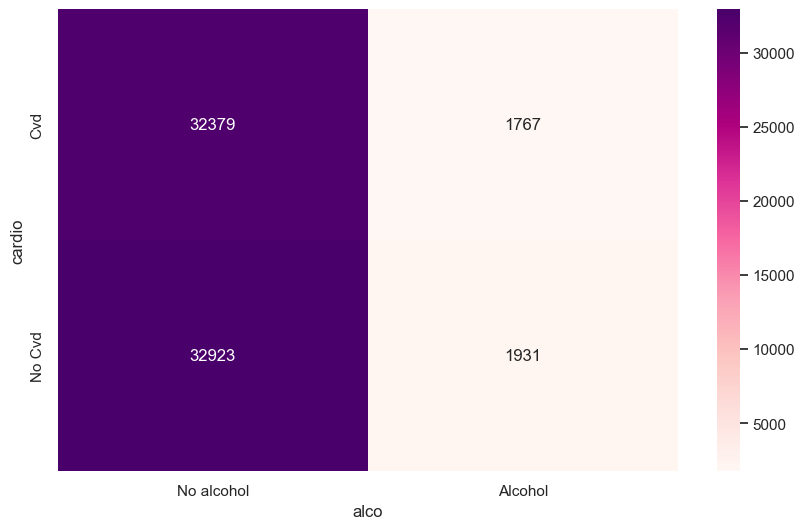

In [563]:
plt.figure(figsize = (10, 6))
sb.heatmap(data = cvd_data.groupby(['cardio', 'alco']).size().unstack(), annot = True, cmap = 'RdPu', fmt = 'g')
plt.show()

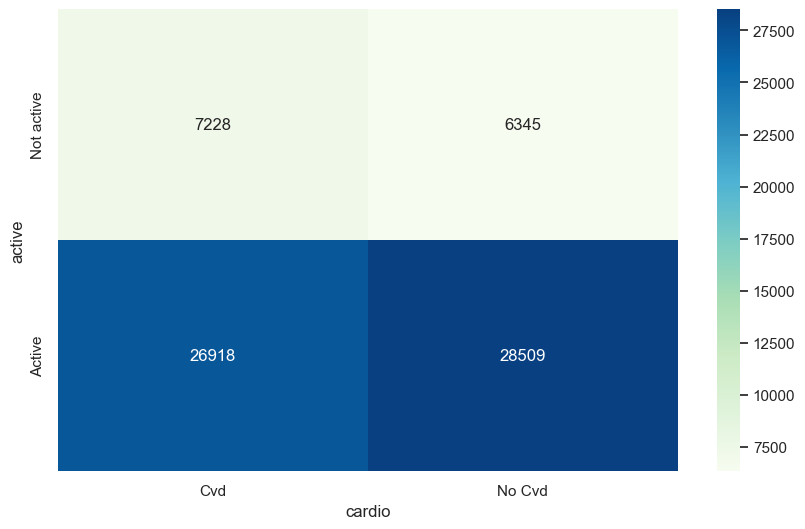

In [564]:
plt.figure(figsize = (10, 6))
sb.heatmap(data = cvd_data.groupby(['active', 'cardio']).size().unstack(), annot = True, cmap = 'GnBu', fmt = 'g')
plt.show()

In [565]:
cvd_data.to_csv("eda.csv")
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          69000 non-null  float64 
 1   gender       69000 non-null  category
 2   ap_hi        69000 non-null  int64   
 3   ap_lo        69000 non-null  int64   
 4   cholesterol  69000 non-null  category
 5   gluc         69000 non-null  category
 6   smoke        69000 non-null  category
 7   alco         69000 non-null  category
 8   active       69000 non-null  category
 9   cardio       69000 non-null  object  
 10  bmi          69000 non-null  float64 
dtypes: category(6), float64(2), int64(2), object(1)
memory usage: 5.6+ MB
